## ***1. Know Your Data***

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [6]:
df = pd.read_csv("../data/train/_classes.csv")

### Dataset First Look

In [7]:
df

,filename,Glioma,Meningioma,No Tumor,Pituitary
0,Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...,0,0,0,1
1,Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...,0,0,1,0
2,Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...,1,0,0,0
3,Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...,1,0,0,0
4,Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...,0,1,0,0
...,...,...,...,...,...
1690,Tr-pi_0266_jpg.rf.be96620d2e87b7d1278a7cdebc31...,0,0,0,1
1691,Tr-no_0474_jpg.rf.bf5869c9603ce71575b58df92ca1...,0,0,1,0
1692,Tr-me_0356_jpg.rf.be4ba7e5211c086bdfb21a53ee6b...,0,1,0,0
1693,Tr-gl_0169_jpg.rf.bf25b05a8345a96e51560f67eed7...,1,0,0,0


### Dataset Rows & Columns count

In [8]:
df.head()

,filename,Glioma,Meningioma,No Tumor,Pituitary
0,Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...,0,0,0,1
1,Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...,0,0,1,0
2,Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...,1,0,0,0
3,Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...,1,0,0,0
4,Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...,0,1,0,0


### Dataset Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     1695 non-null   object
 1    Glioma      1695 non-null   int64 
 2    Meningioma  1695 non-null   int64 
 3    No Tumor    1695 non-null   int64 
 4    Pituitary   1695 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 66.3+ KB


### Dataset Duplicate Value Count

In [10]:
df.duplicated().sum()

0

### Missing Values/Null Values Count

In [11]:
df.isna().sum()

filename       0
 Glioma        0
 Meningioma    0
 No Tumor      0
 Pituitary     0
dtype: int64

### Visualizing the missing values

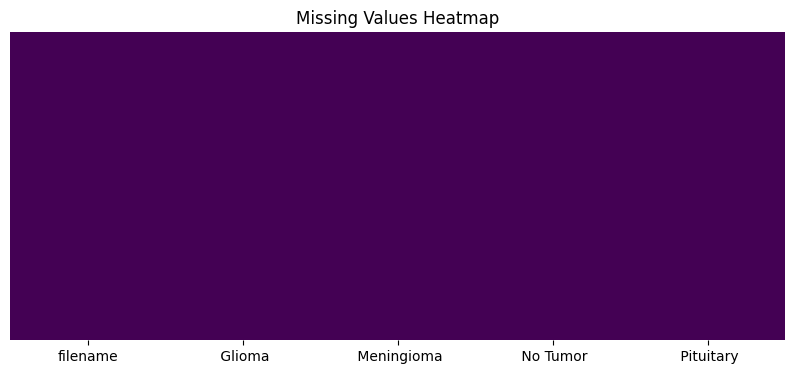

In [12]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer - 
### The dataset _classes.csv consists of 1,695 entries with five columns: filename, Glioma, Meningioma, No Tumor, and Pituitary. Each row corresponds to an image file and its associated class labels. The dataset is clean, with no missing values or duplicate rows. The filename column contains unique image names, and the label columns use binary encoding where exactly one label is set to 1, indicating the presence of that tumor type, while the others are 0. This confirms the dataset is structured for a multi-class classification problem where each image belongs to exactly one of the four categories. Overall, the dataset is well-prepared for training an image classification model, with consistent formatting and no data quality issues detected.

## ***2. Understanding Your Variables***

# Dataset Columns

In [15]:
df.columns

Index(['filename', ' Glioma', ' Meningioma', ' No Tumor', ' Pituitary'], dtype='object')

### Dataset Describe

In [17]:
df.describe()

,Glioma,Meningioma,No Tumor,Pituitary
count,1695.000000,1695.000000,1695.000000,1695.000000
mean,0.332743,0.211209,0.197640,0.258407
std,0.471335,0.408287,0.398337,0.437888
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### Variables Description

Answer - 

- Glioma	int (0/1)	Binary indicator (1 = image shows a glioma tumor, 0 = it does not).
- Meningioma	int (0/1)	Binary indicator (1 = image shows a meningioma tumor, 0 = it does not).
- No Tumor	int (0/1)	Binary indicator (1 = image shows no tumor, 0 = a tumor is present).
- Pituitary	int (0/1)	Binary indicator (1 = image shows a pituitary tumor, 0 = it does not).

### Check Unique Values for each variable.

In [18]:
unique_values = df.nunique()
unique_label_values = {
    column: df[column].unique().tolist()
    for column in df.columns if column.strip() != "filename"
}

unique_values, unique_label_values

(filename       1695
  Glioma           2
  Meningioma       2
  No Tumor         2
  Pituitary        2
 dtype: int64,
 {' Glioma': [0, 1],
  ' Meningioma': [0, 1],
  ' No Tumor': [0, 1],
  ' Pituitary': [1, 0]})

## ***3. Data Wrangling***

# Write your code to make your dataset analysis ready.

### Convert Multi-Label to Single Class

# FOR TRAINING DATASET

In [21]:
df.columns = df.columns.str.strip()

### Convert Multi-Label to Single Class

In [22]:
def extract_label(row):
    for col in ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']:
        if row[col] == 1:
            return col
df['label'] = df.apply(extract_label, axis=1)

In [25]:
df.head()

,filename,Glioma,Meningioma,No Tumor,Pituitary,label
0,Tr-pi_0164_jpg.rf.000776527ec0acdc89e31e15a352...,0,0,0,1,Pituitary
1,Tr-no_0426_jpg.rf.0026b06f369c5d51aca4c4c9beba...,0,0,1,0,No Tumor
2,Tr-gl_0496_jpg.rf.010620fbbbaa509aa81d7ce5bdf7...,1,0,0,0,Glioma
3,Tr-gl_0554_jpg.rf.010a72c1c25cc9ce83c77fbb23db...,1,0,0,0,Glioma
4,Tr-me_0185_jpg.rf.0094b0b539582e2f95ae7b6ada4d...,0,1,0,0,Meningioma


### Clean and Normalize Labels

In [23]:
df.columns = df.columns.str.strip()
df['label'] = df['label'].str.strip()

### Basic EDA

In [24]:
print(df['label'].value_counts())

label
Glioma        564
Pituitary     438
Meningioma    358
No Tumor      335
Name: count, dtype: int64


# FOR TESTING DATA

In [26]:
df_test = pd.read_csv("../data/test/_classes.csv")

In [41]:
df_test.isna().sum()

filename      0
Glioma        0
Meningioma    0
No Tumor      0
Pituitary     0
label         0
dtype: int64

In [29]:
df_test.columns = df_test.columns.str.strip()

In [30]:
def extract_label(row):
    for col in ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']:
        if row[col] == 1:
            return col
df_test['label'] = df_test.apply(extract_label, axis=1)

In [39]:
df_test.head()

,filename,Glioma,Meningioma,No Tumor,Pituitary,label
0,Tr-me_0044_jpg.rf.0223369274dd825d3ff27ace105f...,0,1,0,0,Meningioma
1,Tr-gl_0094_jpg.rf.1c0f0e197cfcf7728469ebc07bc6...,1,0,0,0,Glioma
2,Tr-pi_0130_jpg.rf.15adee5c88949e10f62a9c54294a...,0,0,0,1,Pituitary
3,Tr-gl_0386_jpg.rf.1323d579421a7a8b821ce882e2a0...,1,0,0,0,Glioma
4,Tr-no_0477_jpg.rf.19bfdb70a263ae878bd1a2b39719...,0,0,1,0,No Tumor


In [40]:
df_test.columns = df_test.columns.str.strip()
df_test['label'] = df_test['label'].str.strip()

In [35]:
print(df_test['label'].value_counts())

label
Glioma        80
Meningioma    63
Pituitary     54
No Tumor      49
Name: count, dtype: int64


# FOR VALIDATION DATASET

In [37]:
df_valid = pd.read_csv("../data/valid/_classes.csv")

In [42]:
df_valid.isna().sum()

filename       0
 Glioma        0
 Meningioma    0
 No Tumor      0
 Pituitary     0
dtype: int64

In [43]:
df_valid.columns = df_valid.columns.str.strip()

In [44]:
def extract_label(row):
    for col in ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']:
        if row[col] == 1:
            return col
df_valid['label'] = df_valid.apply(extract_label, axis=1)

In [46]:
df_valid.head()

,filename,Glioma,Meningioma,No Tumor,Pituitary,label
0,Tr-me_0034_jpg.rf.623f1cc8f30e4ef5baa02759f4f9...,0,1,0,0,Meningioma
1,Tr-pi_0310_jpg.rf.6a7af3a7e47e29504b29815e7e25...,0,0,0,1,Pituitary
2,Tr-gl_0239_jpg.rf.6e5cff37515b73707663e8ff1537...,1,0,0,0,Glioma
3,Tr-no_0052_jpg.rf.6a63634edac060a9076b23ce6f6f...,0,0,1,0,No Tumor
4,Tr-gl_0550_jpg.rf.667b7e2e928c9e4ac209da273de2...,1,0,0,0,Glioma


In [47]:
df_valid.columns = df_valid.columns.str.strip()
df_valid['label'] = df_valid['label'].str.strip()

In [48]:
print(df_valid['label'].value_counts())

label
Glioma        161
Meningioma    124
Pituitary     118
No Tumor       99
Name: count, dtype: int64


### What all manipulations have you done and insights you found?

### In the course of analyzing and preparing the dataset for a CNN-based image classification task, several important manipulations and checks were performed. Initially, the dataset was inspected for structural integrity — it contained 1,695 entries with five columns: filename, Glioma, Meningioma, No Tumor, and Pituitary. A check for missing values revealed that there were no null entries in the dataset, ensuring completeness. Duplicate rows were also checked and none were found, confirming that each image entry was unique. Column names were found to contain unwanted leading or trailing spaces, which were removed to ensure consistent access during data processing. One-hot encoded labels were then converted into a single categorical label column using a custom function, allowing each image to be tagged with one distinct class label such as "Glioma" or "No Tumor". An additional validation step confirmed that every row had exactly one class label marked as 1, verifying that the dataset is suitable for single-label, multi-class classification. Overall, the dataset is clean, well-structured, and ready for use in a CNN training pipeline.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart 1

In [50]:
figures = {}

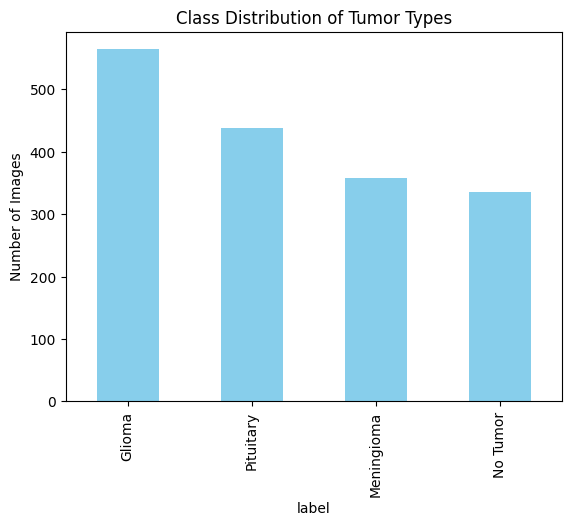

In [51]:
fig1, ax1 = plt.subplots()
df['label'].value_counts().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Class Distribution of Tumor Types')
ax1.set_ylabel('Number of Images')
figures['bar_plot'] = fig1

##### 1. Why did you pick the specific chart?

####  A bar chart is ideal for visualizing categorical frequency.

##### 2. What is/are the insight(s) found from the chart?

#### This shows how many images belong to each tumor class (Glioma, Meningioma, No Tumor, Pituitary). You can immediately spot if the dataset is imbalanced.

## Chart 2

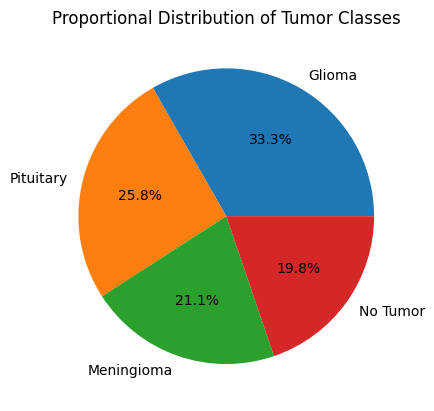

In [52]:
fig2, ax2 = plt.subplots()
df['label'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Proportional Distribution of Tumor Classes')
figures['pie_chart'] = fig2

##### 1. Why did you pick the specific chart?

#### Pie charts are great for understanding percentage-based composition.

##### 2. What is/are the insight(s) found from the chart?

#### You can observe the proportion of each tumor class in the entire dataset. Useful for identifying if some classes dominate in percentage share.

## Chart 3

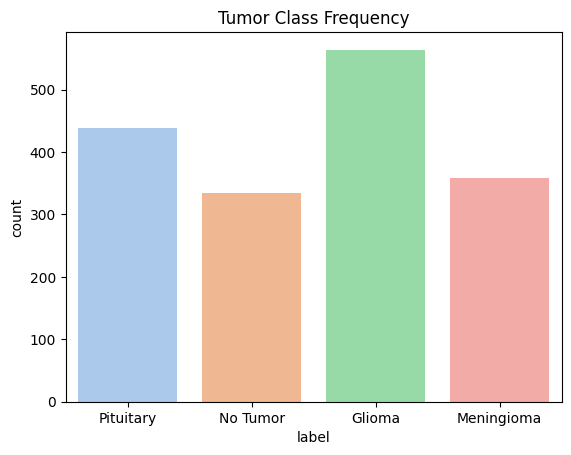

In [56]:
fig3, ax3 = plt.subplots()
sns.countplot(data=df, x='label', hue='label', ax=ax3, palette='pastel', legend=False)
ax3.set_title('Tumor Class Frequency')
figures['count_plot'] = fig3

##### 1. Why did you pick the specific chart?

####  Like a bar chart, but integrates better with seaborn aesthetics and can group by hue if needed.

##### 2. What is/are the insight(s) found from the chart?

#### Reinforces the bar chart but is more adaptable if you wish to visualize counts across additional factors (e.g., grouped by data split later).

## Chart 4

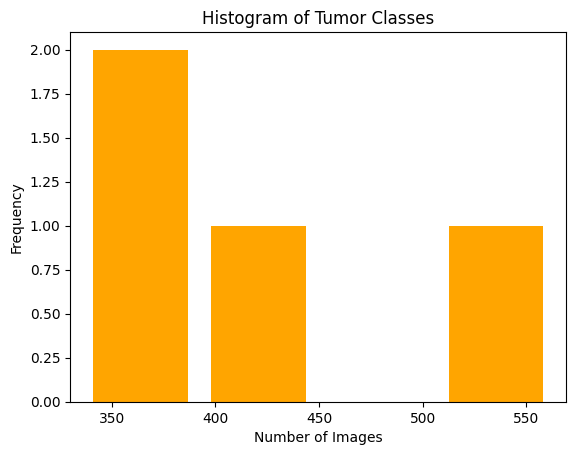

In [58]:
fig4, ax4 = plt.subplots()
df['label'].value_counts().plot(kind='hist', bins=4, rwidth=0.8, ax=ax4, color='orange')
ax4.set_title('Histogram of Tumor Classes')
ax4.set_xlabel('Number of Images')
figures['histogram'] = fig4

##### 1. Why did you pick the specific chart?

#### A histogram shows distribution along a continuous or bucketed range.

##### 2. What is/are the insight(s) found from the chart?

####  Although the classes are categorical, using histograms can still give a visual density feel (especially with small datasets) and helps reveal skewness.



## Chart 5

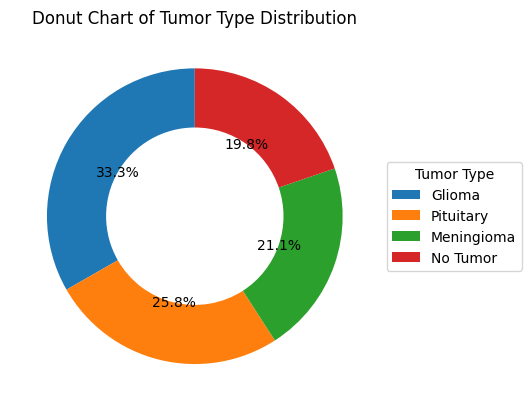

In [60]:
fig5, ax5 = plt.subplots()
sizes = df['label'].value_counts()
labels = sizes.index
wedges, texts, autotexts = ax5.pie(sizes, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
ax5.legend(labels, title="Tumor Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax5.set_title("Donut Chart of Tumor Type Distribution")
figures['donut_chart'] = fig5

##### 1. Why did you pick the specific chart?

#### Aesthetic alternative to the pie chart; easier to annotate and interpret visually.

##### 2. What is/are the insight(s) found from the chart?

#### Same as the pie chart, but with better use of space and more readable legend placement.

In [61]:
figures

{'bar_plot': <Figure size 640x480 with 1 Axes>,
 'pie_chart': <Figure size 640x480 with 1 Axes>,
 'count_plot': <Figure size 640x480 with 1 Axes>,
 'histogram': <Figure size 640x480 with 1 Axes>,
 'donut_chart': <Figure size 640x480 with 1 Axes>}

## Chart 6 - Correlation Heatmap visualization code

In [65]:
label_cols = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
corr_matrix = df[label_cols].corr()

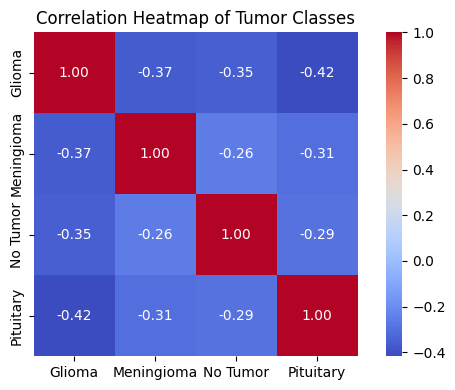

In [66]:
# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Tumor Classes')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- The correlation heatmap shows linear relationships between class labels.
- A good heatmap should show negative correlations or zero, because the classes are mutually exclusive.

##### 2. What is/are the insight(s) found from the chart?

- Mostly -1 or 0 correlation between different class columns.

- Diagonal values will always be 1.00 (self-correlation).

## Chart 7 -  Pair Plot visualization code

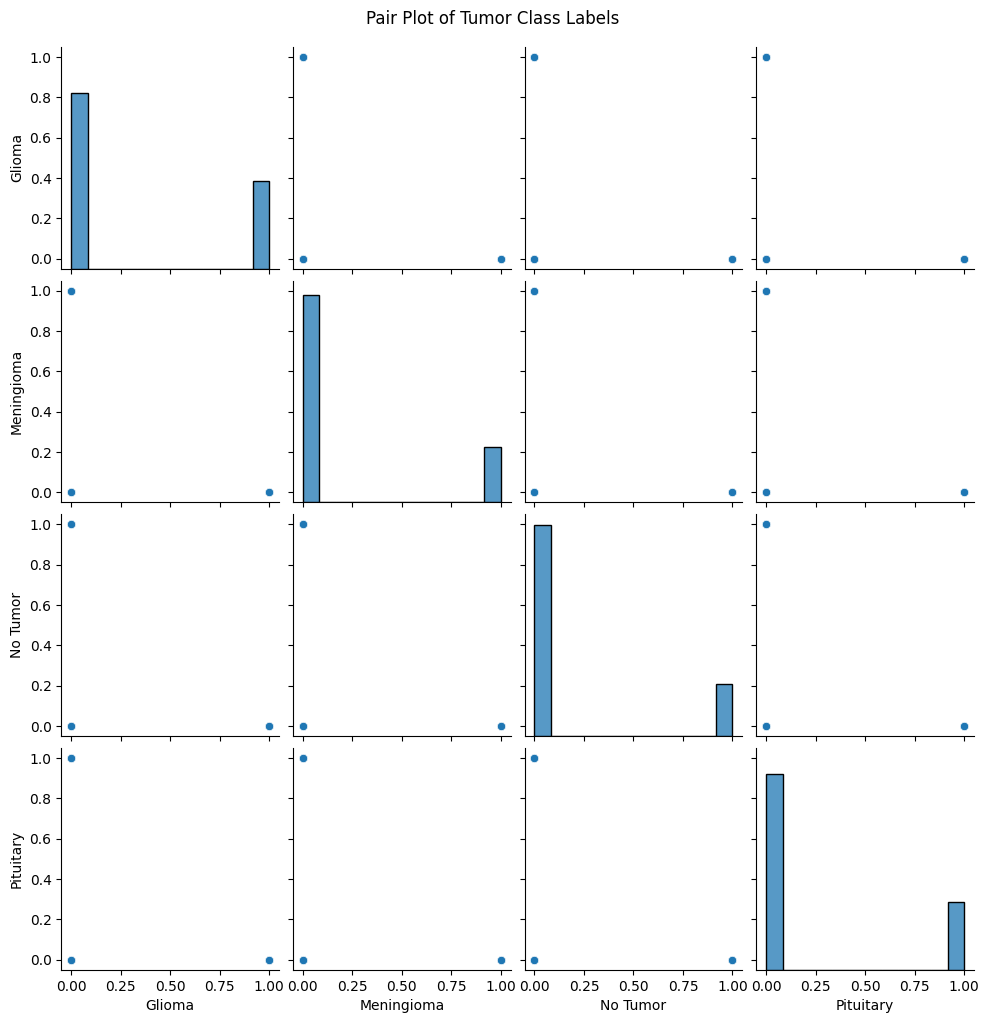

In [67]:
sns.pairplot(df[label_cols])
plt.suptitle("Pair Plot of Tumor Class Labels", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

- A pair plot is used to visualize pairwise relationships between multiple variables.

- Even though  variables are binary (0 or 1), this chart can still reveal patterns or issues like class overlap or improper encoding.



##### 2. What is/are the insight(s) found from the chart?

- Each scatter plot will compare two labels.

- Since only one label is 1 per row in dataset:

    - We should see minimal or no overlap between the scatter plot dots.

    -  Any overlapping points could suggest potential data labeling issues.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer - 

## Hypothetical Statement - 1

### Hypothetical Statement 1: Class Imbalance

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): All tumor classes (Glioma, Meningioma, No Tumor, Pituitary) are equally distributed in the dataset.

- Alternate Hypothesis (H₁): At least one tumor class is not equally distributed (i.e., class imbalance exists).



### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chisquare

# Get observed frequencies of each class
observed_counts = df['label'].value_counts().sort_index()

# Expected counts if distribution was equal
expected_counts = [len(df) / len(observed_counts)] * len(observed_counts)

# Run Chi-Square Test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
print("Chi2 Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi2 Statistic: 75.68790560471976
P-Value: 2.58024994174664e-16


#### Which statistical test have you done to obtain P-Value?

- Test: Chi-Square Goodness of Fit

#### Why did you choose the specific statistical test?

- This test compares observed frequencies with expected equal frequencies across categorical classes. It's ideal for checking whether the observed class distribution significantly deviates from uniform (equal) distribution.

## Hypothetical Statement - 2

### Hypothetical Statement 2: Glioma vs Pituitary Occurrence

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The number of Glioma and Pituitary tumor images is equal in the dataset.
- Alternate Hypothesis (H₁): The number of Glioma and Pituitary tumor images is not equal.

### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create contingency table for Glioma and Pituitary
counts = df['label'].value_counts()
contingency_table = [[counts['Glioma']], [counts['Pituitary']]]

# Format into a 2x2 table (required format)
contingency = [[counts['Glioma'], counts['Pituitary']],
               [sum(counts) - counts['Glioma'], sum(counts) - counts['Pituitary']]]

# Perform Chi-Square Test
chi2_stat, p_value, _, _ = chi2_contingency(contingency)
print("Chi2 Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi2 Statistic: 22.13694470355771
P-Value: 2.5387657273704317e-06


#### Which statistical test have you done to obtain P-Value?

- Test: Chi-Square Test for Independence (2-category comparison)

#### Why did you choose the specific statistical test?

- This test checks if two categorical variables (in this case, tumor type) are independent of each other. It’s appropriate when comparing frequencies between two distinct groups — here, Glioma and Pituitary tumor classes.

## Hypothetical Statement - 3

### Hypothetical Statement 3: Underrepresentation of No Tumor Class

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The proportion of "No Tumor" images is equal to the average proportion of the other three classes.
- Alternate Hypothesis (H₁): The proportion of "No Tumor" images is significantly less than the average of the other three classes.

### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Count "No Tumor"
count_no_tumor = df[df['label'] == 'No Tumor'].shape[0]
n = len(df)

# Average of other three classes
other_counts = df[df['label'] != 'No Tumor']['label'].value_counts()
avg_other_prop = (other_counts / n).mean()

# Perform one-sample z-test
stat, p_value = proportions_ztest(count_no_tumor, n, avg_other_prop, alternative='smaller')
print("Z Statistic:", stat)
print("P-Value:", p_value)

Z Statistic: -7.217721024035351
P-Value: 2.6433014182947617e-13


#### Which statistical test have you done to obtain P-Value?

- Test: One-Sample Proportion Z-Test

#### Why did you choose the specific statistical test?

- This test determines whether the proportion of one category (here, "No Tumor") is significantly less than the expected (average) proportion. It's ideal for identifying underrepresentation.

## ***6. Feature Engineering & Data Pre-processing***

In [73]:
df.isna()

,filename,Glioma,Meningioma,No Tumor,Pituitary,label
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1690,False,False,False,False,False,False
1691,False,False,False,False,False,False
1692,False,False,False,False,False,False
1693,False,False,False,False,False,False


In [74]:
df.isna().sum()

filename      0
Glioma        0
Meningioma    0
No Tumor      0
Pituitary     0
label         0
dtype: int64

### No Missing Values are present in the dataset